# Read spectral Data

In [1]:
import EpmPython.read as read 
s = read.SpectralState('stateSpectralEPM.hdf5') #geometry=sphere 
print('Vel Pol:', s.fields.velocity_pol.shape)
print('Vel Tor:', s.fields.velocity_tor.shape)

Vel Pol: (66, 11)
Vel Tor: (66, 11)


# A) $\omega_f$ : uniform vorticity 

In [3]:
from EpmPython.sphere.spectral import computeUniformVorticity
rmax = 1.0
omegaF=computeUniformVorticity(s, rmax)
print('Omega_f: ', omegaF)

Omega_f:  [-2.18317115e-16  1.00000000e+00 -2.65032236e-19]


# B) Align with the fluid axis

In [5]:
#%pdb
from EpmPython.sphere.spectral import alignAlongFluidAxis
#s=alignAlongFluidAxis(s, omegaF)
#TODO: change this to a deep copy to avoid reopening the file 
sAligned = alignAlongFluidAxis(s, omegaF) 

In [6]:
#toto = s 
#s.fields.velocity_pol
#toto.fields.velocity_pol = toto.fields.velocity_pol+1

# C) Write state file  

In [6]:
from EpmPython.sphere.spectral import writeStateFile
filename='rotatedState.hdf5' #keep same structure as original hdf5 files 
writeStateFile(s, filename)
#Leo: change the initializer to 
#rotState = SpectralState(velP, velT, condensity)

# D) $\gamma_f$: rotation angle of the fluid   

In [7]:
from EpmPython.sphere.spectral import getGammaF
#filename = ''
#getGammaF()

# E) Go to Fluid Frame 

In [6]:
from EpmPython.sphere.spectral import goToFluidFrameOfReference
#getGammaF(filename)
gamma = 0
sFluid = goToFluidFrameOfReference(sAligned, gamma)

# F) Get Integrator

In [12]:
from EpmPython.sphere.spectral import getZIntegrator
nNs = 40
getZIntegrator?
zInt = getZIntegrator(s, "uS", nNs) #return dictionary 
#getZIntegrator(s, "uS", nNs) #Default use full resolution 
#optional:
#getZIntegrator(s, "uS", filename)
#computeZIntegral(s, "uS", integrator=filename, (nNs=, maxN=, maxL=, maxM=))

# E) Get Z-Integral

In [8]:
from EpmPython.sphere.spectral import getZIntegral 
zIntegral = getZIntegral(s, zInt)
#Leo: change it to computeZIntegral(s, zInt) !!! 
#getGeostrophicPhysical(zIntegral) 
#Leo: to reconstruct the geostrophic integrals in a 2D equatorial grid 

# E) Get Slices

In [9]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


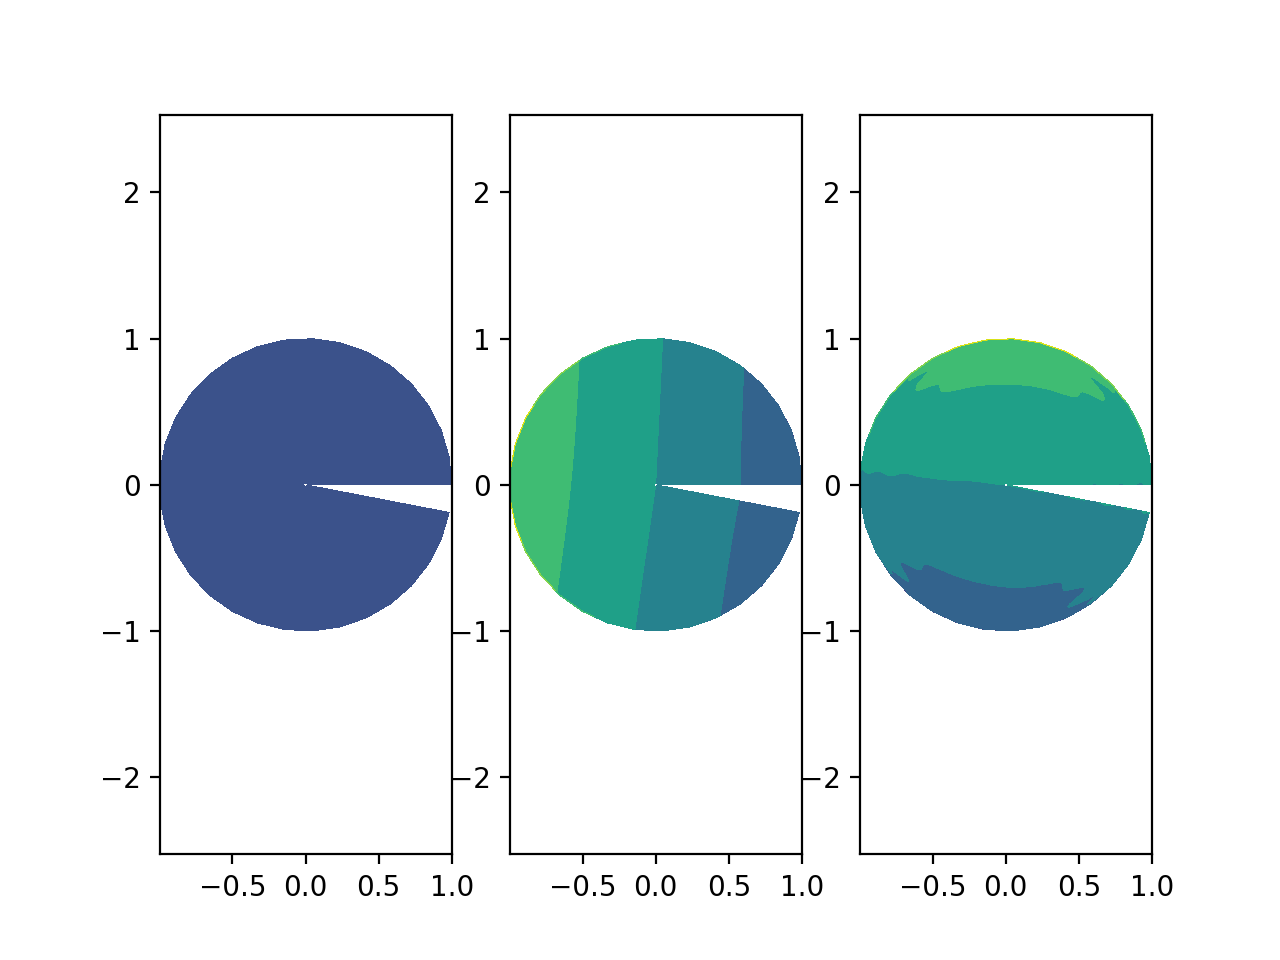

In [12]:
from EpmPython.sphere.spectral import getEquatorialSlice
#from sphare import make...
eqSlice=getEquatorialSlice(s)
#Leo: 
#change this to makeEquatorialSliceFromSpectral
#optional
#eqSlice=s.getEquatorialSlice()
plt.subplot(131)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_r'].T)
plt.subplot(132)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_theta'].T)
plt.subplot(133)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_phi'].T)

<IPython.core.display.Javascript object>


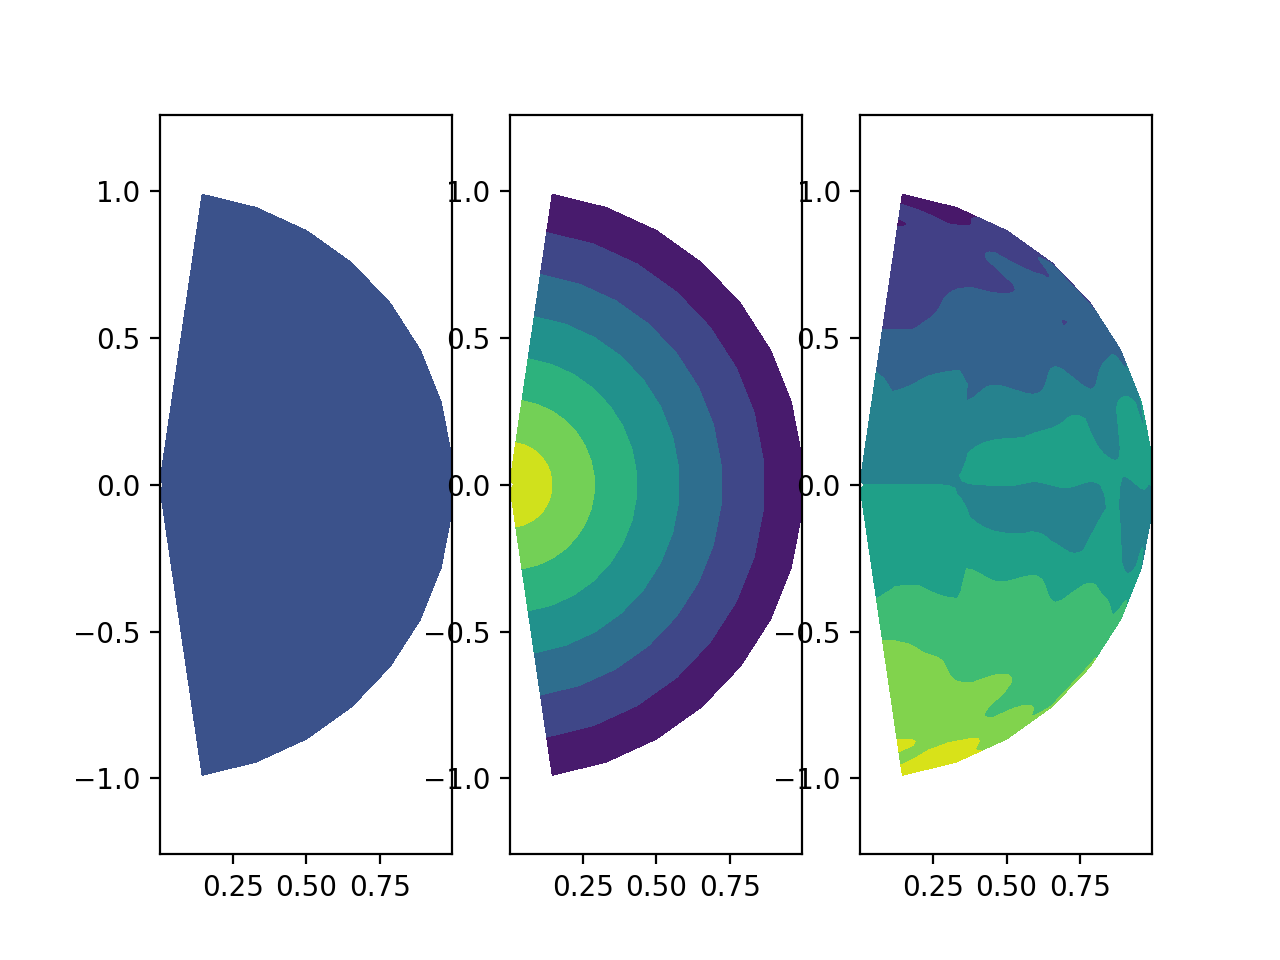

In [13]:
from EpmPython.sphere.spectral import getMeridionalSlice
#from read import makeMeridionalSlice
#merSlice=s.getMeridionalSlice()
merSlice=getMeridionalSlice(s) 
#merSlice = getMeridionalSlice(s, field='velocity')
#fields='velocity', 'vorticity',  
plt.subplot(131)
plt.axis('Equal')
#change the output to Transpose 
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_r'].T) #uR
plt.subplot(132)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_theta'].T) #uTheta
plt.subplot(133)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_phi'].T) #uPhi

In [6]:
from EpmPython.sphere.physical import getEquatorialSlice
from EpmPython.sphere.physical import getMeridionalSlice
filename = 'statePhysicalEPM.hdf5'
p = read.PhysicalState(filename)
eqSlice=getEquatorialSlice(p)
merSlice=getMeridionalSlice(p)

-0.09515604598670224 0.09515604598670224
